In [1]:
import pandas as pd
import numpy as np
import pickle
import xgboost
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier 
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv("C:/Users/vineet/Desktop/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [5]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [7]:
Num_val = {'Yes':1, 'No':0}
data['Attrition'] = data["Attrition"].apply(lambda x: Num_val[x])
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
data.corr()['Attrition']

Age                        -0.159205
Attrition                   1.000000
DailyRate                  -0.056652
DistanceFromHome            0.077924
Education                  -0.031373
EmployeeCount                    NaN
EmployeeNumber             -0.010577
EnvironmentSatisfaction    -0.103369
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobSatisfaction            -0.103481
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StandardHours                    NaN
StockOptionLevel           -0.137145
TotalWorkingYears          -0.171063
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
YearsAtCompany             -0.134392
YearsInCurrentRole         -0.160545
YearsSinceLastPromotion    -0.033019
YearsWithCurrManager       -0.156199
N

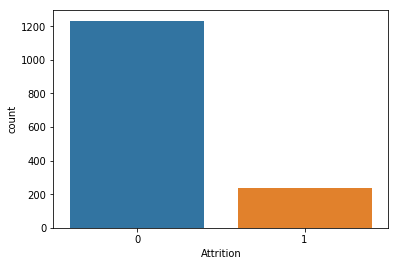

In [10]:
sns.countplot(x='Attrition', data=data)

In [11]:
data.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [12]:
data["BusinessTravel"].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [13]:
data.drop(columns=["Department","EducationField","Education","EmployeeCount","BusinessTravel",\
                 "HourlyRate","Over18","MonthlyIncome","OverTime","StockOptionLevel","StandardHours"], inplace = True)

(array([ 57., 105., 224., 265., 255., 217., 131.,  92.,  77.,  47.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <a list of 10 Patch objects>)

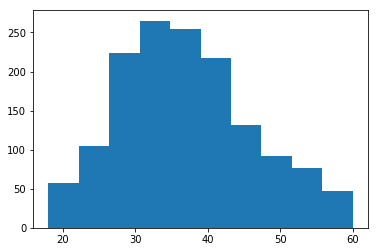

In [14]:
plt.hist(data.Age)

In [16]:
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,1,2,Female,3,2,Sales Executive,...,11,3,1,8,0,1,6,4,0,5
1,49,0,279,8,2,3,Male,2,2,Research Scientist,...,23,4,4,10,3,3,10,7,1,7
2,37,1,1373,2,4,4,Male,2,1,Laboratory Technician,...,15,3,2,7,3,3,0,0,0,0
3,33,0,1392,3,5,4,Female,3,1,Research Scientist,...,11,3,3,8,3,3,8,7,3,0
4,27,0,591,2,7,1,Male,3,1,Laboratory Technician,...,12,3,4,6,3,3,2,2,2,2


In [17]:
after_data = data.groupby(["Attrition","Gender","MaritalStatus"]).mean().reset_index().drop(columns = ["EmployeeNumber"])

In [18]:
after_data.sample(5)

,Attrition,Gender,MaritalStatus,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
6,1,Female,Divorced,32.555556,530.666667,10.111111,2.444444,2.333333,1.222222,2.666667,...,14.333333,3.000000,2.666667,7.111111,2.000000,2.444444,4.888889,3.444444,2.000000,2.333333
8,1,Female,Single,29.595745,751.851064,9.659574,2.276596,2.531915,1.510638,2.276596,...,15.553191,3.234043,2.276596,6.446809,2.787234,2.851064,4.446809,2.510638,1.702128,2.872340
3,0,Male,Divorced,37.419355,831.833333,9.225806,2.790323,2.784946,2.215054,2.822581,...,15.021505,3.129032,2.774194,11.930108,2.811828,2.779570,7.645161,4.537634,2.016129,4.575269
2,0,Female,Single,37.065789,774.796053,8.565789,2.835526,2.750000,2.085526,2.927632,...,14.967105,3.111842,2.953947,11.421053,2.907895,2.802632,6.901316,4.190789,2.217105,4.407895
7,1,Female,Married,37.096774,758.903226,13.064516,2.483871,2.580645,2.000000,2.580645,...,15.064516,3.129032,2.645161,11.354839,2.451613,2.774194,8.451613,4.483871,2.548387,4.064516


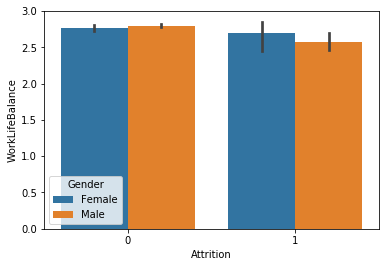

In [19]:
sns.barplot(x="Attrition", y = "WorkLifeBalance", hue = "Gender", data = after_data)

In [20]:
def plotmatrix(start,end):
    fig, axs = plt.subplots(nrows = 2, ncols=2)
    i = 0
    cols = after_data.columns[start:end]
    fig.set_size_inches(14, 10)
    for indi in range(2):
        for indj in range(2):
                sns.barplot(x="Attrition",y=str(cols[i]),data = after_data,ax = axs[indi][indj],hue = "MaritalStatus")\
                .set_title("affect of "+str(cols[i]))
                print("column : "+str(cols[i]))
                i+=1

column : Age
column : DailyRate
column : DistanceFromHome
column : EnvironmentSatisfaction


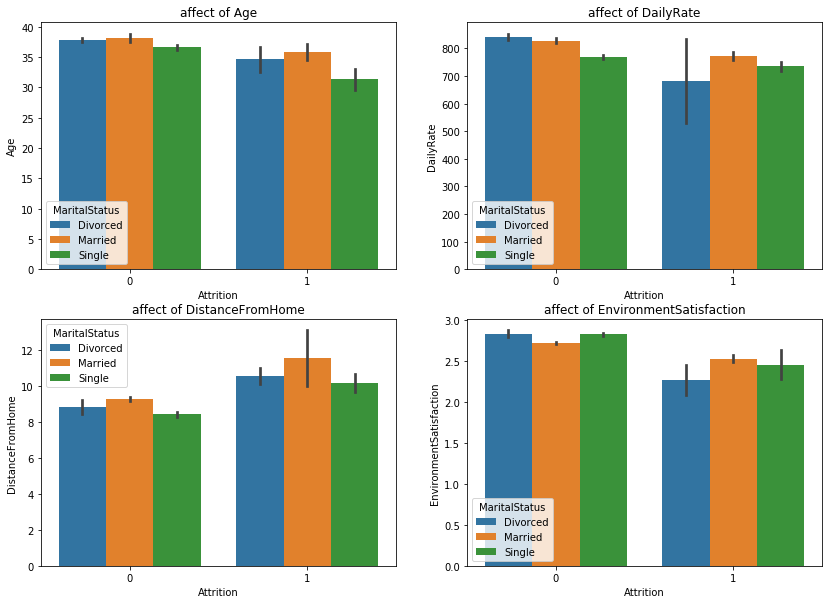

In [21]:
plotmatrix(3,7)

In [23]:
#Average Age of employees those who left the IBM is less compared to others.
#Average Daily Rate of employees those who left the IBM is less compared to others.
#Average Distance from Home of employees those who left the IBM is more compared to others.
#Average Environment Satisfaction of employees those who left the IBM is less compared to others

column : JobLevel
column : JobSatisfaction
column : MonthlyRate
column : NumCompaniesWorked


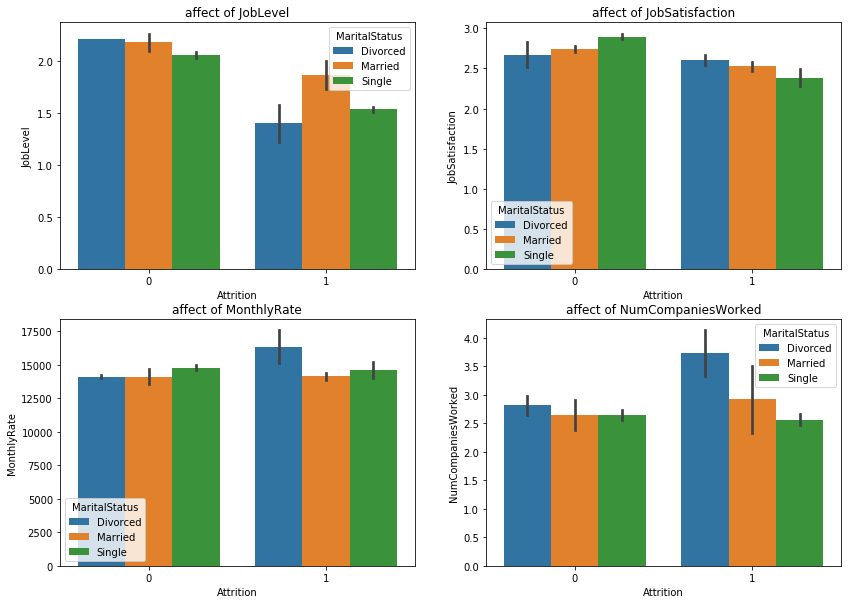

In [24]:
plotmatrix(8,12)

In [25]:
data["Gender"] = data.Gender.map({"Female" : 0, "Male" : 1})
data["MaritalStatus"] = data.MaritalStatus.map({"Divorced":0,"Married":1,"Single":2})

In [26]:
final_data = data[after_data.drop(columns=["MonthlyRate","PerformanceRating"]).columns]
final_data.head()
final_X = final_data.drop(columns=["Attrition"])
final_Y = final_data["Attrition"]

In [27]:
train_x, test_x, train_y, test_y = train_test_split(final_X, final_Y,test_size = 0.1)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
model = LogisticRegression()
model.fit(train_x,train_y)
target = model.predict(test_x)
print("accuracy score : ",accuracy_score(target, test_y))

C:\Users\vineet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy score :  0.8367346938775511


In [29]:
from xgboost import XGBClassifier
for i in range(2,7):
    model = XGBClassifier(max_depth=i)
    model.fit(train_x,train_y)
    target = model.predict(test_x)
    print("accuracy score : ",accuracy_score(target, test_y))
print(confusion_matrix(test_y,target))

accuracy score :  0.8095238095238095
accuracy score :  0.7959183673469388
accuracy score :  0.782312925170068
accuracy score :  0.7891156462585034
accuracy score :  0.8027210884353742
[[111   7]
 [ 22   7]]


In [30]:
pd.Series(test_y).value_counts()


0    118
1     29
Name: Attrition, dtype: int64

In [31]:
pd.Series(target).value_counts()

0    133
1     14
dtype: int64